
    This Source Code Form is subject to the terms of the Mozilla Public
    License, v. 2.0. If a copy of the MPL was not distributed with this
    file, You can obtain one at http://mozilla.org/MPL/2.0/.


In [1]:
# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# To ease the loading of modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load PEPACS module
from pepacs.agents.pepacs import PEPACS, Configuration

# Load Metrics
from example.metrics.MazeMetrics import \
    _maze_metrics, \
    _how_many_peps_match_non_aliased_states, \
    _mean_reliable_classifier_specificity, \
    _when_full_knowledge_is_achieved, \
    _enhanced_effect_error

# Load Plotting Wrappers
from example.metrics.MazePlottingWrapper import \
    parse_metrics_to_df, \
    plot_performance

# Load environments
import gym
import my_mazes

# Agent - PEPACS

## Common parameters

In [2]:
#Environmental Set Up
RANDOM_ATTRIBUTE_LENGTH = 0
CLASSIFIER_LENGTH = 8 + RANDOM_ATTRIBUTE_LENGTH
NUMBER_OF_POSSIBLE_ACTIONS = 8
SLIPPERY_PROB = 0.
MAZE = "Woods100-v0"

#Exploration Set Up
NUMBER_OF_EXPLORE_TRIALS = 5000
METRICS_TRIAL_FREQUENCY_EXPLORE = 100
EPSILON = 0.8
BETA_ALP = 0.05

#Exploitation Set Up
NUMBER_OF_EXPLOIT_TRIALS_NO_RL = 500
BETA_EXPLOIT_NO_RL = 0.05
NUMBER_OF_EXPLOIT_TRIALS_RL_START = 500
BETA_EXPLOIT_RL_START = 0.05
NUMBER_OF_EXPLOIT_TRIALS_RL = 500
BETA_EXPLOIT_RL = 0.05

#RL Set Up
GAMMA = 0.95
BETA_RL = 0.05

#GA Set Up
DO_GA = True
CROSSOVER = 0.8
MUTATION = 0.3

#PEPACS Set Up
DO_ZIP = True
ENABLE_PEP = True

## Environment - Maze

In [3]:
# Initialize environment
maze = gym.make(MAZE)
# Set up probability to do a random action
maze.env.set_prob_slippery(SLIPPERY_PROB)
# Set up random attribute length
maze.env.set_random_attribute_length(RANDOM_ATTRIBUTE_LENGTH)
# Reset it, by putting an agent into random position
maze.reset()
# Render the state in ASCII
maze.render('aliasing_human')
# Get environmental state transitions
#maze.env.get_theoritical_probabilities()


■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ ■ □ $ □ ■ A ■
■ ■ ■ ■ ■ ■ ■ ■ ■


## Training of PEPACS - Exploration

In [4]:
%%time
#%%prun -l 0.5 -T profiling.txt

cfg_explore = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=METRICS_TRIAL_FREQUENCY_EXPLORE,
    do_pep=ENABLE_PEP,
    do_ga=DO_GA,
    beta_alp=BETA_ALP,
    beta_rl=BETA_RL,
    gamma=GAMMA,
    epsilon=EPSILON,
    u_max=CLASSIFIER_LENGTH,
    mu=MUTATION,
    chi=CROSSOVER
)

agent_explore = PEPACS(cfg_explore)
population_explore, metrics_explore = agent_explore.explore(maze, NUMBER_OF_EXPLORE_TRIALS)

CPU times: user 15.9 s, sys: 30.2 ms, total: 15.9 s
Wall time: 15.9 s


### Performance

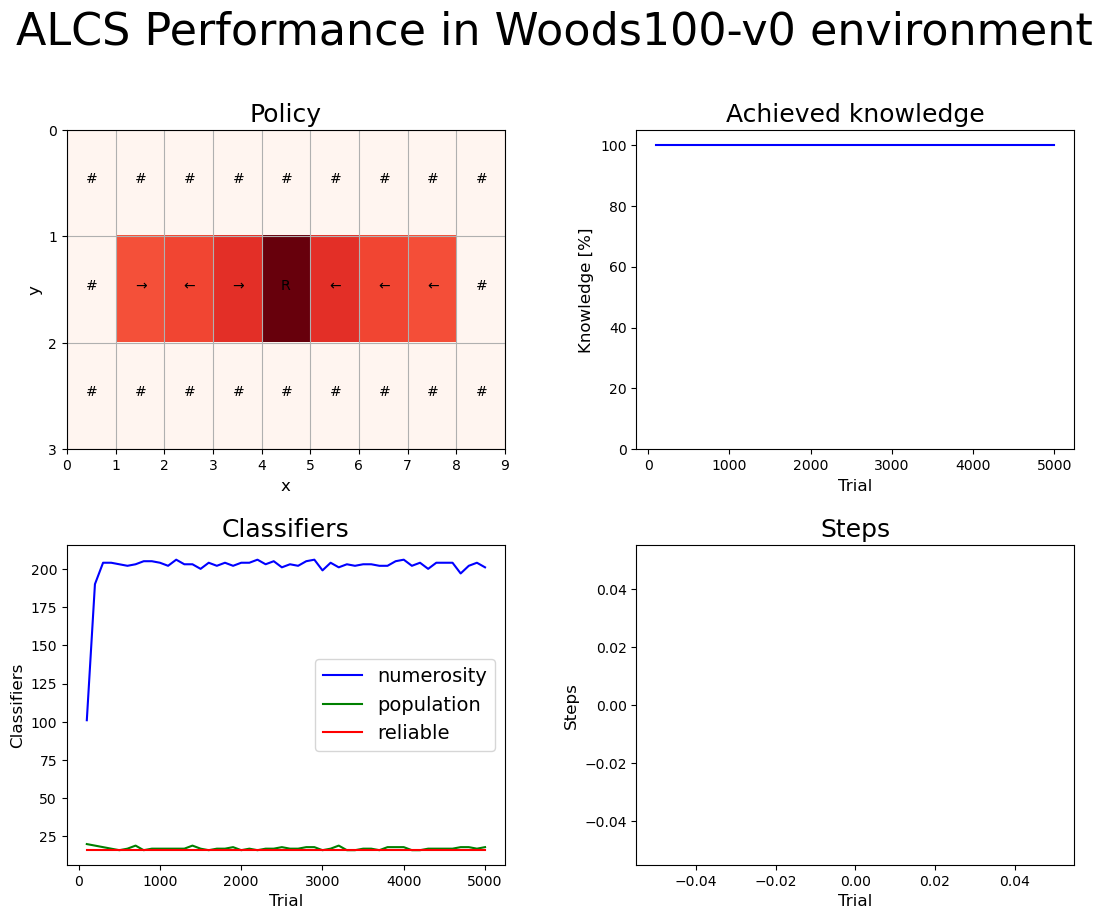

In [5]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, None, None)
plot_performance(agent_explore, maze, metrics_df, cfg_explore, MAZE, metrics_trial_frequency_explore, None)

In [6]:
first_trial, stable_trial, last_trial = _when_full_knowledge_is_achieved(metrics_explore)
print("Full knowledge was achieved at trials ", first_trial, ", was stable at ", stable_trial, 
        " and the last time it was achieved at ", last_trial)

print("There are ", _how_many_peps_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.\n")

print(_maze_metrics(population_explore, maze))
print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(population_explore, maze))
pep_error = _enhanced_effect_error(population_explore, maze, CLASSIFIER_LENGTH, RANDOM_ATTRIBUTE_LENGTH)
print("Accumulated Error on PEP Probabilities :", pep_error, "%\n")

if DO_ZIP:
    agent_explore.zip_population()
    population_explore = agent_explore.get_population()

print("There are ", _how_many_peps_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.\n")

print(_maze_metrics(population_explore, maze))
print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(population_explore, maze))
pep_error = _enhanced_effect_error(population_explore, maze, CLASSIFIER_LENGTH, RANDOM_ATTRIBUTE_LENGTH)
print("Accumulated Error on PEP Probabilities :", pep_error, "%")

Full knowledge was achieved at trials  100 , was stable at  100  and the last time it was achieved at  5000
There are  0  enhanced classifer(s) that match a non-aliased states.

{'knowledge': 100.0, 'population': 18, 'numerosity': 201, 'reliable': 16}
Mean reliable population specifity is  0.09375
Accumulated Error on PEP Probabilities : 0.035836138072494125 %

There are  0  enhanced classifer(s) that match a non-aliased states.

{'knowledge': 100.0, 'population': 18, 'numerosity': 201, 'reliable': 16}
Mean reliable population specifity is  0.09375
Accumulated Error on PEP Probabilities : 0.035836138072494125 %


In [7]:
population_explore.sort(key=lambda cl: -cl.fitness)
population_explore_to_display = [cl for cl in population_explore]
for cl in population_explore_to_display:
    print(cl)
    print("\n")

##9##### 2 ##0#####
q: 1.0    r: 1e+03  ir: 1e+03  f: 1e+03  
exp: 2490  num: 20 ee: False
Mark: empty tga: 67544 talp: 67544 tav: 26.77  



######9# 6 ######0#
q: 1.0    r: 1e+03  ir: 1e+03  f: 1e+03  
exp: 2504  num: 20 ee: False
Mark: empty tga: 67454 talp: 67543 tav: 19.8   



##0###0# 6 ######{9:55.25%, 1:44.75%}#
q: 1.0    r: 891.7  ir: 0.0    f: 891.7  
exp: 6540  num: 19 ee: False
Mark: empty tga: 67453 talp: 67543 tav: 8.14   



##0###0# 2 ##{1:50.48%, 9:49.52%}#####
q: 1.0    r: 883.4  ir: 0.0    f: 883.4  
exp: 6485  num: 18 ee: False
Mark: empty tga: 67507 talp: 67537 tav: 10.82  



######## 7 ########
q: 1.0    r: 857.1  ir: 0.0    f: 857.1  
exp: 4851  num: 1 ee: False
Mark: empty tga: 67452 talp: 67527 tav: 15.53  



######9# 2 ######0#
q: 1.0    r: 856.4  ir: 0.0    f: 856.4  
exp: 1620  num: 19 ee: False
Mark: empty tga: 67437 talp: 67522 tav: 36.37  



##1##### 6 ##0#####
q: 1.0    r: 855.3  ir: 0.0    f: 855.3  
exp: 4004  num: 19 ee: False
Mark: empty tga: 674

## Training of PEPACS - Exploitation

In [8]:
%%time

cfg_exploit_no_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_NO_RL,
    gamma=GAMMA,
    epsilon=0.2
)

agent_exploit_no_rl = PEPACS(cfg_exploit_no_rl, population_explore)
population_exploit_no_rl, metrics_exploit_no_rl = agent_exploit_no_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_NO_RL)

CPU times: user 707 ms, sys: 2.79 ms, total: 710 ms
Wall time: 713 ms


In [9]:
%%time

cfg_exploit_rl_start = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_RL_START,
    gamma=GAMMA,
    epsilon=0.0
)

agent_exploit_rl_start = PEPACS(cfg_exploit_rl_start, population_exploit_no_rl)
population_exploit_rl_start, metrics_exploit_rl_start = agent_exploit_rl_start.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL_START)

CPU times: user 1.09 s, sys: 3.84 ms, total: 1.09 s
Wall time: 1.1 s


In [10]:
%%time

cfg_exploit_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_RL,
    gamma=GAMMA,
    epsilon=0.0,
)

agent_exploit_rl = PEPACS(cfg_exploit_rl, population_exploit_rl_start)
population_exploit_rl, metrics_exploit_rl = agent_exploit_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL)

CPU times: user 1.61 s, sys: 5.06 ms, total: 1.62 s
Wall time: 1.63 s


### Performance

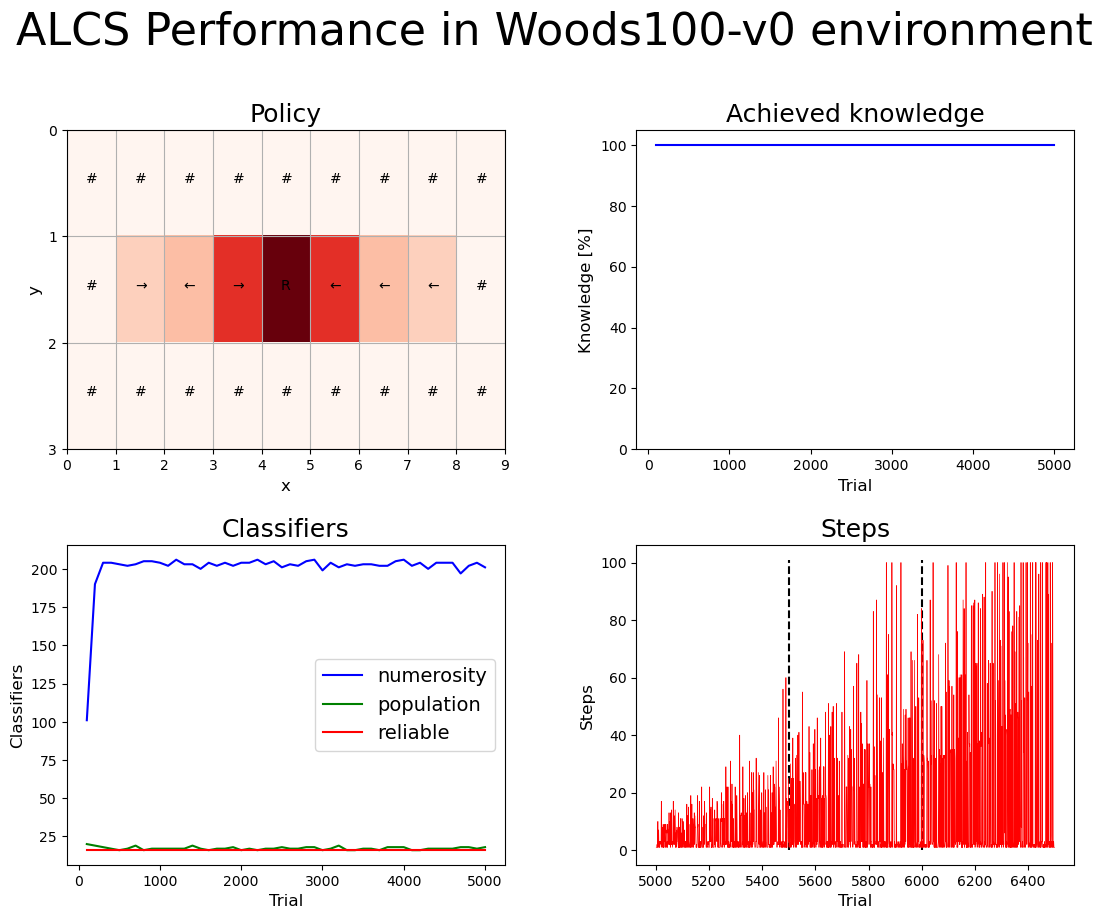

In [11]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency
metrics_trial_frequency_exploit = 1

metrics_exploit = metrics_exploit_no_rl.copy()
for idx, item in enumerate(metrics_exploit_rl_start):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL
    metrics_exploit.append(tmp)
for idx, item in enumerate(metrics_exploit_rl):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL + NUMBER_OF_EXPLOIT_TRIALS_RL_START
    metrics_exploit.append(tmp)

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, metrics_exploit, metrics_trial_frequency_exploit)
plot_performance(agent_exploit_rl, maze, metrics_df, cfg_exploit_rl, MAZE, metrics_trial_frequency_explore, [NUMBER_OF_EXPLOIT_TRIALS_NO_RL,NUMBER_OF_EXPLOIT_TRIALS_RL_START,NUMBER_OF_EXPLOIT_TRIALS_RL])

In [12]:
avg_step_explore = 0
for trial in metrics_explore:
    avg_step_explore += trial['steps_in_trial']
avg_step_explore /= NUMBER_OF_EXPLORE_TRIALS / metrics_trial_frequency_explore
print("Average number of steps to solve the maze is ",avg_step_explore,
      " for a total of ", NUMBER_OF_EXPLORE_TRIALS, " trials in EXPLORATION")

avg_step_exploit_no_rl = 0
for trial in metrics_exploit_no_rl:
    avg_step_exploit_no_rl += trial['steps_in_trial']
avg_step_exploit_no_rl /= NUMBER_OF_EXPLOIT_TRIALS_NO_RL
print("Average number of steps to solve the maze is ",avg_step_exploit_no_rl,
      " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_NO_RL, " trials in EXPLOITATION without Reinforcement Module")

avg_step_exploit_rl_start = 0
for trial in metrics_exploit_rl_start:
    avg_step_exploit_rl_start += trial['steps_in_trial']
avg_step_exploit_rl_start /= NUMBER_OF_EXPLOIT_TRIALS_RL_START
print("Average number of steps to solve the maze is ",avg_step_exploit_rl_start,
      " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_RL_START, " trials in EXPLOITATION starting Reinforcement Module")

avg_step_exploit_rl = 0
for trial in metrics_exploit_rl:
    avg_step_exploit_rl += trial['steps_in_trial']
avg_step_exploit_rl /= NUMBER_OF_EXPLOIT_TRIALS_RL
print("Average number of steps to solve the maze is ",avg_step_exploit_rl,
      " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_RL, " trials in EXPLOITATION with Reinforcement Module")

print(_maze_metrics(population_explore, maze))
print(_maze_metrics(population_exploit_no_rl, maze))
print(_maze_metrics(population_exploit_rl_start, maze))
print(_maze_metrics(population_exploit_rl, maze))

Average number of steps to solve the maze is  13.76  for a total of  5000  trials in EXPLORATION
Average number of steps to solve the maze is  6.356  for a total of  500  trials in EXPLOITATION without Reinforcement Module
Average number of steps to solve the maze is  13.212  for a total of  500  trials in EXPLOITATION starting Reinforcement Module
Average number of steps to solve the maze is  22.338  for a total of  500  trials in EXPLOITATION with Reinforcement Module
{'knowledge': 100.0, 'population': 18, 'numerosity': 201, 'reliable': 16}
{'knowledge': 100.0, 'population': 18, 'numerosity': 201, 'reliable': 16}
{'knowledge': 100.0, 'population': 18, 'numerosity': 201, 'reliable': 16}
{'knowledge': 100.0, 'population': 18, 'numerosity': 201, 'reliable': 16}


In [13]:
population_exploit_rl.sort(key=lambda cl: -cl.fitness)
population_exploit_rl_to_display = [cl for cl in population_exploit_rl]
print(len(population_exploit_rl_to_display))
print("\n")
for cl in population_exploit_rl_to_display:
    print(cl)
    print("\n")

18


##9##### 2 ##0#####
q: 1.0    r: 1e+03  ir: 1e+03  f: 1e+03  
exp: 2490  num: 20 ee: False
Mark: empty tga: 67544 talp: 67544 tav: 26.77  



######9# 6 ######0#
q: 1.0    r: 1e+03  ir: 1e+03  f: 1e+03  
exp: 2504  num: 20 ee: False
Mark: empty tga: 67454 talp: 67543 tav: 19.8   



######## 7 ########
q: 1.0    r: 857.1  ir: 0.0    f: 857.1  
exp: 4851  num: 1 ee: False
Mark: empty tga: 67452 talp: 67527 tav: 15.53  



######9# 2 ######0#
q: 1.0    r: 856.4  ir: 0.0    f: 856.4  
exp: 1620  num: 19 ee: False
Mark: empty tga: 67437 talp: 67522 tav: 36.37  



######## 1 ########
q: 1.0    r: 851.7  ir: 0.0    f: 851.7  
exp: 4935  num: 1 ee: False
Mark: empty tga: 67472 talp: 67539 tav: 15.73  



######## 0 ########
q: 1.0    r: 849.5  ir: 0.0    f: 849.5  
exp: 8831  num: 1 ee: False
Mark: empty tga: 67459 talp: 67541 tav: 9.696  



######## 5 ########
q: 1.0    r: 849.0  ir: 0.0    f: 849.0  
exp: 4918  num: 1 ee: False
Mark: empty tga: 67503 talp: 67532 tav: 11.44  



##9##